In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import ticker

In [2]:
df = pd.read_csv('top-performer-2.csv')
df

selection objective  Catalog  PME Code               library  \
0     LPS NF-kB Suppressor   139796  PME-4855       Selleckchem FDA   
1     LPS NF-kB Suppressor   139760  PME-4426       Selleckchem FDA   
2    MPLA NF-kB Suppressor   139099  PME-4119       Selleckchem FDA   
3    MPLA NF-kB Suppressor    85335  PME-3974    LifeChem Bioactive   
4     CpG NF-kB Suppressor    55572  PME-5149    ChemBridge ES550-2   
5     CpG NF-kB Suppressor   139099  PME-4119       Selleckchem FDA   
6   LMCpG NF-kB Suppressor   139099  PME-4119       Selleckchem FDA   
7   LMCpG NF-kB Suppressor   139760  PME-4426       Selleckchem FDA   
8       LPS NF-kB Enhancer   139103  PME-4637       Selleckchem FDA   
9       LPS NF-kB Enhancer   138585  PME-4800             Prestwick   
10     MPLA NF-kB Enhancer    70420  PME-5839    ChemBridge ES550-2   
11     MPLA NF-kB Enhancer   138632  PME-5084             Prestwick   
12      CpG NF-kB Enhancer   137328  PME-4974  Microsource Spectrum   
13      CpG NF-kB Enhancer   139784  PME-4873       Selleckchem FDA   
14    LMCpG NF-kB Enhancer     6017  PME-5246    ChemBridge DS550-3   
15    LMCpG NF-kB Enhancer   137328  PME-4974  Microsource Spectrum   
16        LPS IRF Enhancer   139247  PME-4695       Selleckchem FDA   
17        LPS IRF Enhancer     9929  PME-3465    ChemBridge DS550-3   
18       MPLA IRF Enhancer    70420  PME-5839    ChemBridge ES550-2   
19       MPLA IRF Enhancer   139204  PME-4633       Selleckchem FDA   
20      cGAMP IRF Enhancer   137526  PME-4392  Microsource Spectrum   
21      cGAMP IRF Enhancer   138180  PME-5071             Prestwick   
22    LMcGAMP IRF Enhancer   139247  PME-4695       Selleckchem FDA   
23    LMcGAMP IRF Enhancer     9929  PME-3465    ChemBridge DS550-3   

                                  alternative library          ID  \
0                                                  No       S8195   
1                                                  No       S7765   
2                                                  No       S1048   
3                                                  No  F3139-0666   
4                                                  No     6095001   
5                                                  No       S1048   
6                                                  No       S1048   
7                                                  No       S7765   
8                                                  No       S1065   
9                             Selleckchem FDA (S4182)  Prestw-555   
10                                                 No     6429591   
11                                                 No  Prestw-866   
12  NCI 4 Nat Product (102816), NCI 7 Oncology (10...     1502111   
13                                                 No       S8034   
14                                                 No     5194493   
15  NCI 4 Nat Product (102816), NCI 7 Oncology (10...     1502111   
16                                                 No       S1718   
17                                                 No     5244378   
18                                                 No     6429591   
19                                                 No       S1482   
20    Prestwick (Prestw-125), Selleckchem FDA (S4731)     1503934   
21                                                 No  Prestw-200   
22                                                 No       S1718   
23                                                 No     5244378   

                                             SMILES_x  Viability Mask 1  \
0   CNS(=O)(=O)C[C@H]1CC[C@H](N(C)c2ncnc3[nH]ccc23...          0.998232   
1   CC(O)C(=O)O.CN1CCN(c2ccc3nc(-c4c(N)c5c(F)cccc5...          0.980802   
2   Cc1cc(Nc2cc(N3CCN(C)CC3)nc(Sc3ccc(NC(=O)C4CC4)...          0.880897   
3         COc1ccc(C(=O)C=Cc2cc(OC)c(OC)c(OC)c2)c(O)c1          0.732484   
4                           Cc1cc(N2CCNCC2)c2ccccc2n1          0.992429   
5   Cc1cc(Nc2cc(N3CCN(C)CC3)nc(Sc3ccc(NC(=O)C4CC4)...  

In [3]:
bmdc = pd.read_csv('code-mapping.csv')
bmdc

Experiment #  Catalog             library  PME Code  \
0              1   138180           Prestwick  PME-5071   
1              2   138540           Prestwick  PME-3878   
2              3   139428     Selleckchem FDA  PME-3386   
3              4   139796     Selleckchem FDA  PME-4855   
4              5   139336     Selleckchem FDA  PME-4671   
5              6   139204     Selleckchem FDA  PME-4633   
6              7   139784     Selleckchem FDA  PME-4873   
7              8   138465           Prestwick  PME-3873   
8              9    55572  ChemBridge ES550-2  PME-5149   
9             10   139753     Selleckchem FDA  PME-4425   
10            11     9929  ChemBridge DS550-3  PME-3465   
11            12     6017  ChemBridge DS550-3  PME-5246   
12            13     8269  ChemBridge DS550-3  PME-5920   
13            14     4828  ChemBridge DS550-3  PME-4007   
14            15    70420  ChemBridge ES550-2  PME-5839   
15            16    64437  ChemBridge ES550-2  PME-3808   
16            17   138632           Prestwick  PME-5084   

                                               SMILES  Viability Mask 1  \
0   CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3ccccc3nc2-1         70.026687   
1   COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...         23.557758   
2   CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCC[C@H]3C...          2.161290   
3   CNS(=O)(=O)C[C@H]1CC[C@H](N(C)c2ncnc3[nH]ccc23...         99.823172   
4                 COc1ccc([C@H]2CNC(=O)C2)cc1OC1CCCC1         98.129749   
5   COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2ccc(-c3...         98.777089   
6   CCOc1cc([C@@H](CS(C)(=O)=O)N2C(=O)c3cccc(NC(C)...         98.244803   
7         CCN(CC)CCCC(C)Nc1c2ccc(Cl)cc2nc2ccc(OC)cc12         75.614692   
8                           Cc1cc(N2CCNCC2)c2ccccc2n1         99.242933   
9   Cc1ccc(S(=O)(=O)O)cc1.NC(=O)c1cccc2cn(-c3ccc([...         84.988039   
10                   O=S(=O)(Nc1cccc2cccnc12)c1ccccc1         72.018879   
11              CCN(CC)c1ccc(C=NNC(=O)c2ccccc2)c(O)c1         75.116810   
12           CCN(CC)c1ccc(C=NNC(=O)c2ccc(O)cc2)c(O)c1         43.437277   
13                O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21         51.819833   
14      COC(=O)c1cccc(Nc2nc(C=Cc3ccccc3)nc3ccccc23)c1         82.762709   
15      Fc1ccc(Oc2nc(Nc3cccc(Cl)c3)nc(N3CCOCC3)n2)cc1         77.915627   
16        Nc1ncn(C2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1         73.896501   

    Viability Mask 2   LPS Abs  MPLA Abs   CpG Abs  ...  cGAMP Lum  \
0          83.564790  1.754225  2.946302  1.329549  ...   3.059090   
1          41.390892  0.066742  0.094987  0.070473  ...   0.021358   
2           6.184407  0.050467  0.113745  0.337605  ...   0.024393   
3          99.616351  0.099942  0.413859  0.178629  ...   0.077135   
4          98.222943  2.205368  1.900036  2.608719  ...   0.902336   
5          98.666191  1.169132  1.216268  0.724044  ...   0.756542   
6          97.236498  0.969356  1.686283  2.719268  ...   1.012846   
7          89.459867  0.167110  0.447121  0.078474  ...   0.034570   
8          99.517473  0.788874  0.898852  0.064291  ...   0.560578   
9          91.249750  0.142405  0.371568  0.079770  ...   0.040980   
10         77.043247  0.596631  0.658653  0.961002  ...   1.038111   
11         87.695972  2.107345  4.298026  2.338789  ...   0.072897   
12         71.981299  1.309993  5.860873  2.518654  ...   0.199944   
13         82.368903  1.375078  2.342243  0.603077  ...  15.028693   
14         87.437767  1.276337  5.464253  1.298556  ...   0.658305   
15         90.144082  1.329594  2.574411  0.331237  ...   0.756549   
16         87.308144  1.238237  4.315449  2.010284  ...   0.507841   

    LMcGAMP Lum  LPS Abs Std  MPLA Abs Std  CpG Abs Std  LMCpG Abs Std  \
0      2.588904     0.164820      0.720446     0.227009       0.446371   
1      0.023283     0.019345      0.009158     0.005413       0.012746   
2      0.032364     0.004458      0.004921     0.017558       0.010838   
3      0.240635     0.005009     

In [4]:
xticklabels = [col.replace('Abs', 'NF-$\\kappa$B').replace('Lum', 'IRF') for col in df.columns[-16:-8]]
# xticklabels = [' '.join([col.split(' ')[1], col.split(' ')[0]]) for col in xticklabels]
xticklabels[3] = 'Generalist NF-$\\kappa$B'
xticklabels[7] = 'Generalist IRF'

xticklabels

['LPS NF-$\\kappa$B',
 'MPLA NF-$\\kappa$B',
 'CpG NF-$\\kappa$B',
 'Generalist NF-$\\kappa$B',
 'LPS IRF',
 'MPLA IRF',
 'cGAMP IRF',
 'Generalist IRF']

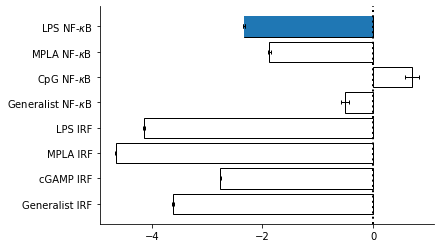

In [5]:
def plot_mod(ax, i, col_hightlight=None):
    ax.barh(np.arange(8), df.iloc[i, -16:-8][::-1].astype(float).apply(np.log2), xerr=df.iloc[i, -8:][::-1], error_kw=dict(lw=1, capsize=2, capthick=1), fill=False)
    if col_hightlight is not None:
        if type(col_hightlight) != list:
            foldchange = np.log2(df.iloc[i, -16+col_hightlight].astype(float))
            ax.barh(7-col_hightlight, foldchange, xerr=df.iloc[i, -8+col_hightlight], error_kw=dict(lw=1, capsize=2, capthick=1), color='tab:blue' if foldchange < 0 else 'tab:red')
        else:
            for col in col_hightlight:
                foldchange = np.log2(df.iloc[i, -16+col].astype(float))
                ax.barh(7-col, foldchange, xerr=df.iloc[i, -8+col], error_kw=dict(lw=1, capsize=2, capthick=1), color='tab:blue' if foldchange < 0 else 'tab:red')
    ax.set_yticks(np.arange(8))
    ax.set_yticklabels(xticklabels[::-1])
    # ax.set_xlabel('Log2 Fold Change')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(5, integer=True))
    # ax.set_xscale('log', base=2)
    # ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    # ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{round(np.log2(float(y))):d}'))
    # ax.set_xticks(ax.get_xticks()[1:-1])
    ax.axvline(0, color='k', linewidth=2, linestyle=':')

fig, ax = plt.subplots(1,1)
plot_mod(ax, 3, 0)

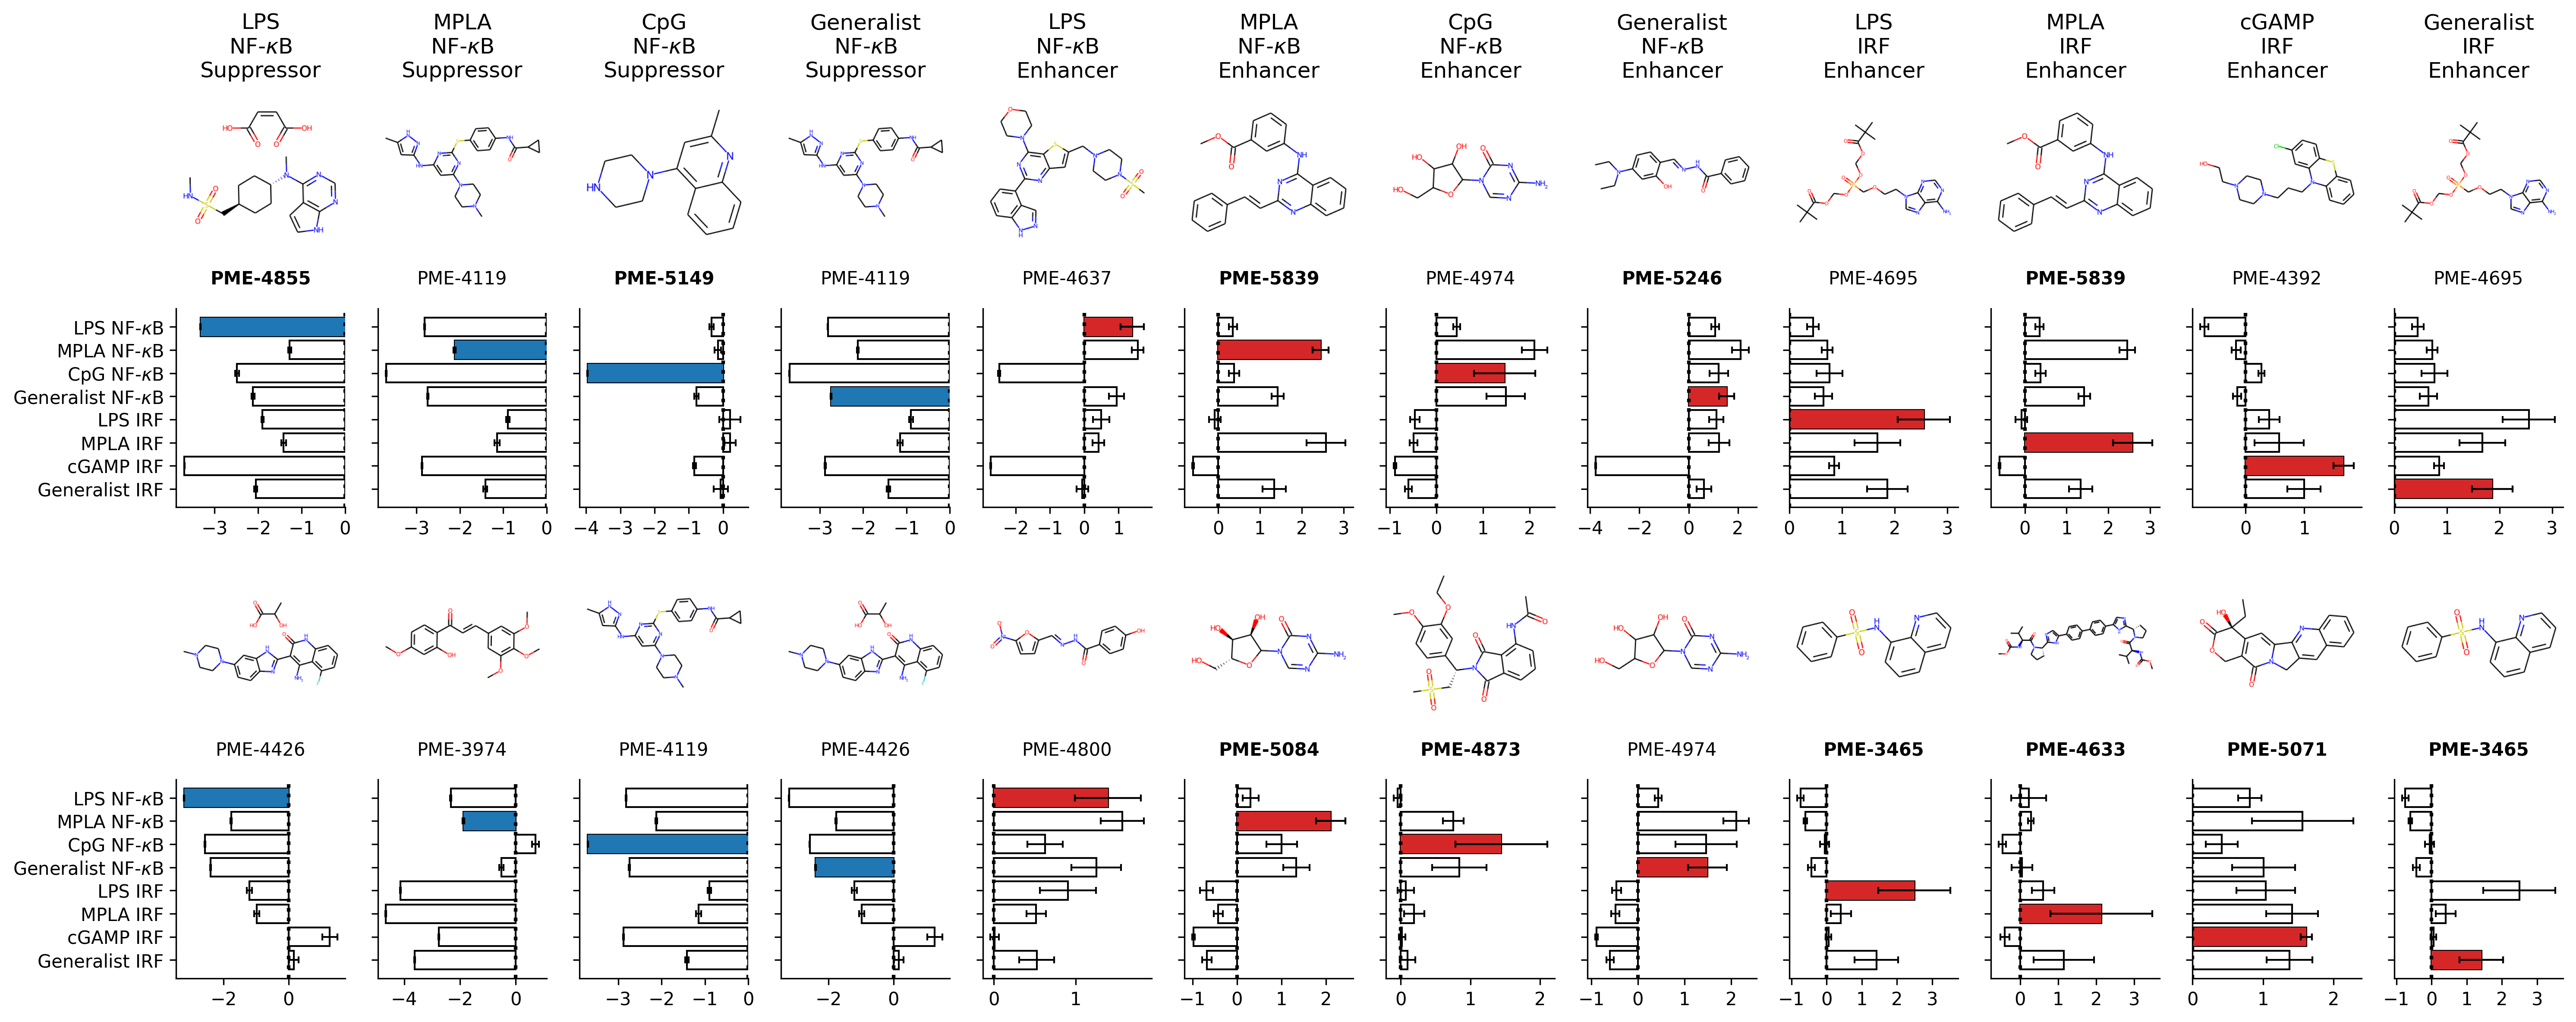

In [6]:
plt.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(nrows=4, ncols=12, dpi=300, figsize=(20,8))

for i in range(4):
    for j in range(12):
        k = i // 2 + j * 2 # index of row in df
        ax = axs[i,j]
        if i % 2 == 0:
            mol_image = np.asarray(Image.open(f'mols/{df.loc[k, "PME Code"]}.png'))
            ax.imshow(mol_image)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.set_xticks([])
            ax.set_yticks([])
            mol = df.loc[k, "PME Code"]
            if mol in bmdc['PME Code'].values:
                ax.set_xlabel(mol, weight='bold')
            else:
                ax.set_xlabel(mol)
            if i == 0:
                objective = df['selection objective'][k].replace('k', '$\\kappa$')
                if 'LM' in objective:
                    objective = objective.replace('LMCpG', 'Generalist').replace('LMcGAMP', 'Generalist')
                # ax.set_ylabel(objective, rotation='horizontal', ha='right')
                ax.set_title(objective.replace(' ', '\n'))
        if i % 2 == 1:
            if j in range(4):
                plot_mod(ax, k, j)
            else:
                plot_mod(ax, k, j-4)
            if j != 0:
                ax.set_yticklabels([])
plt.tight_layout()
plt.show()

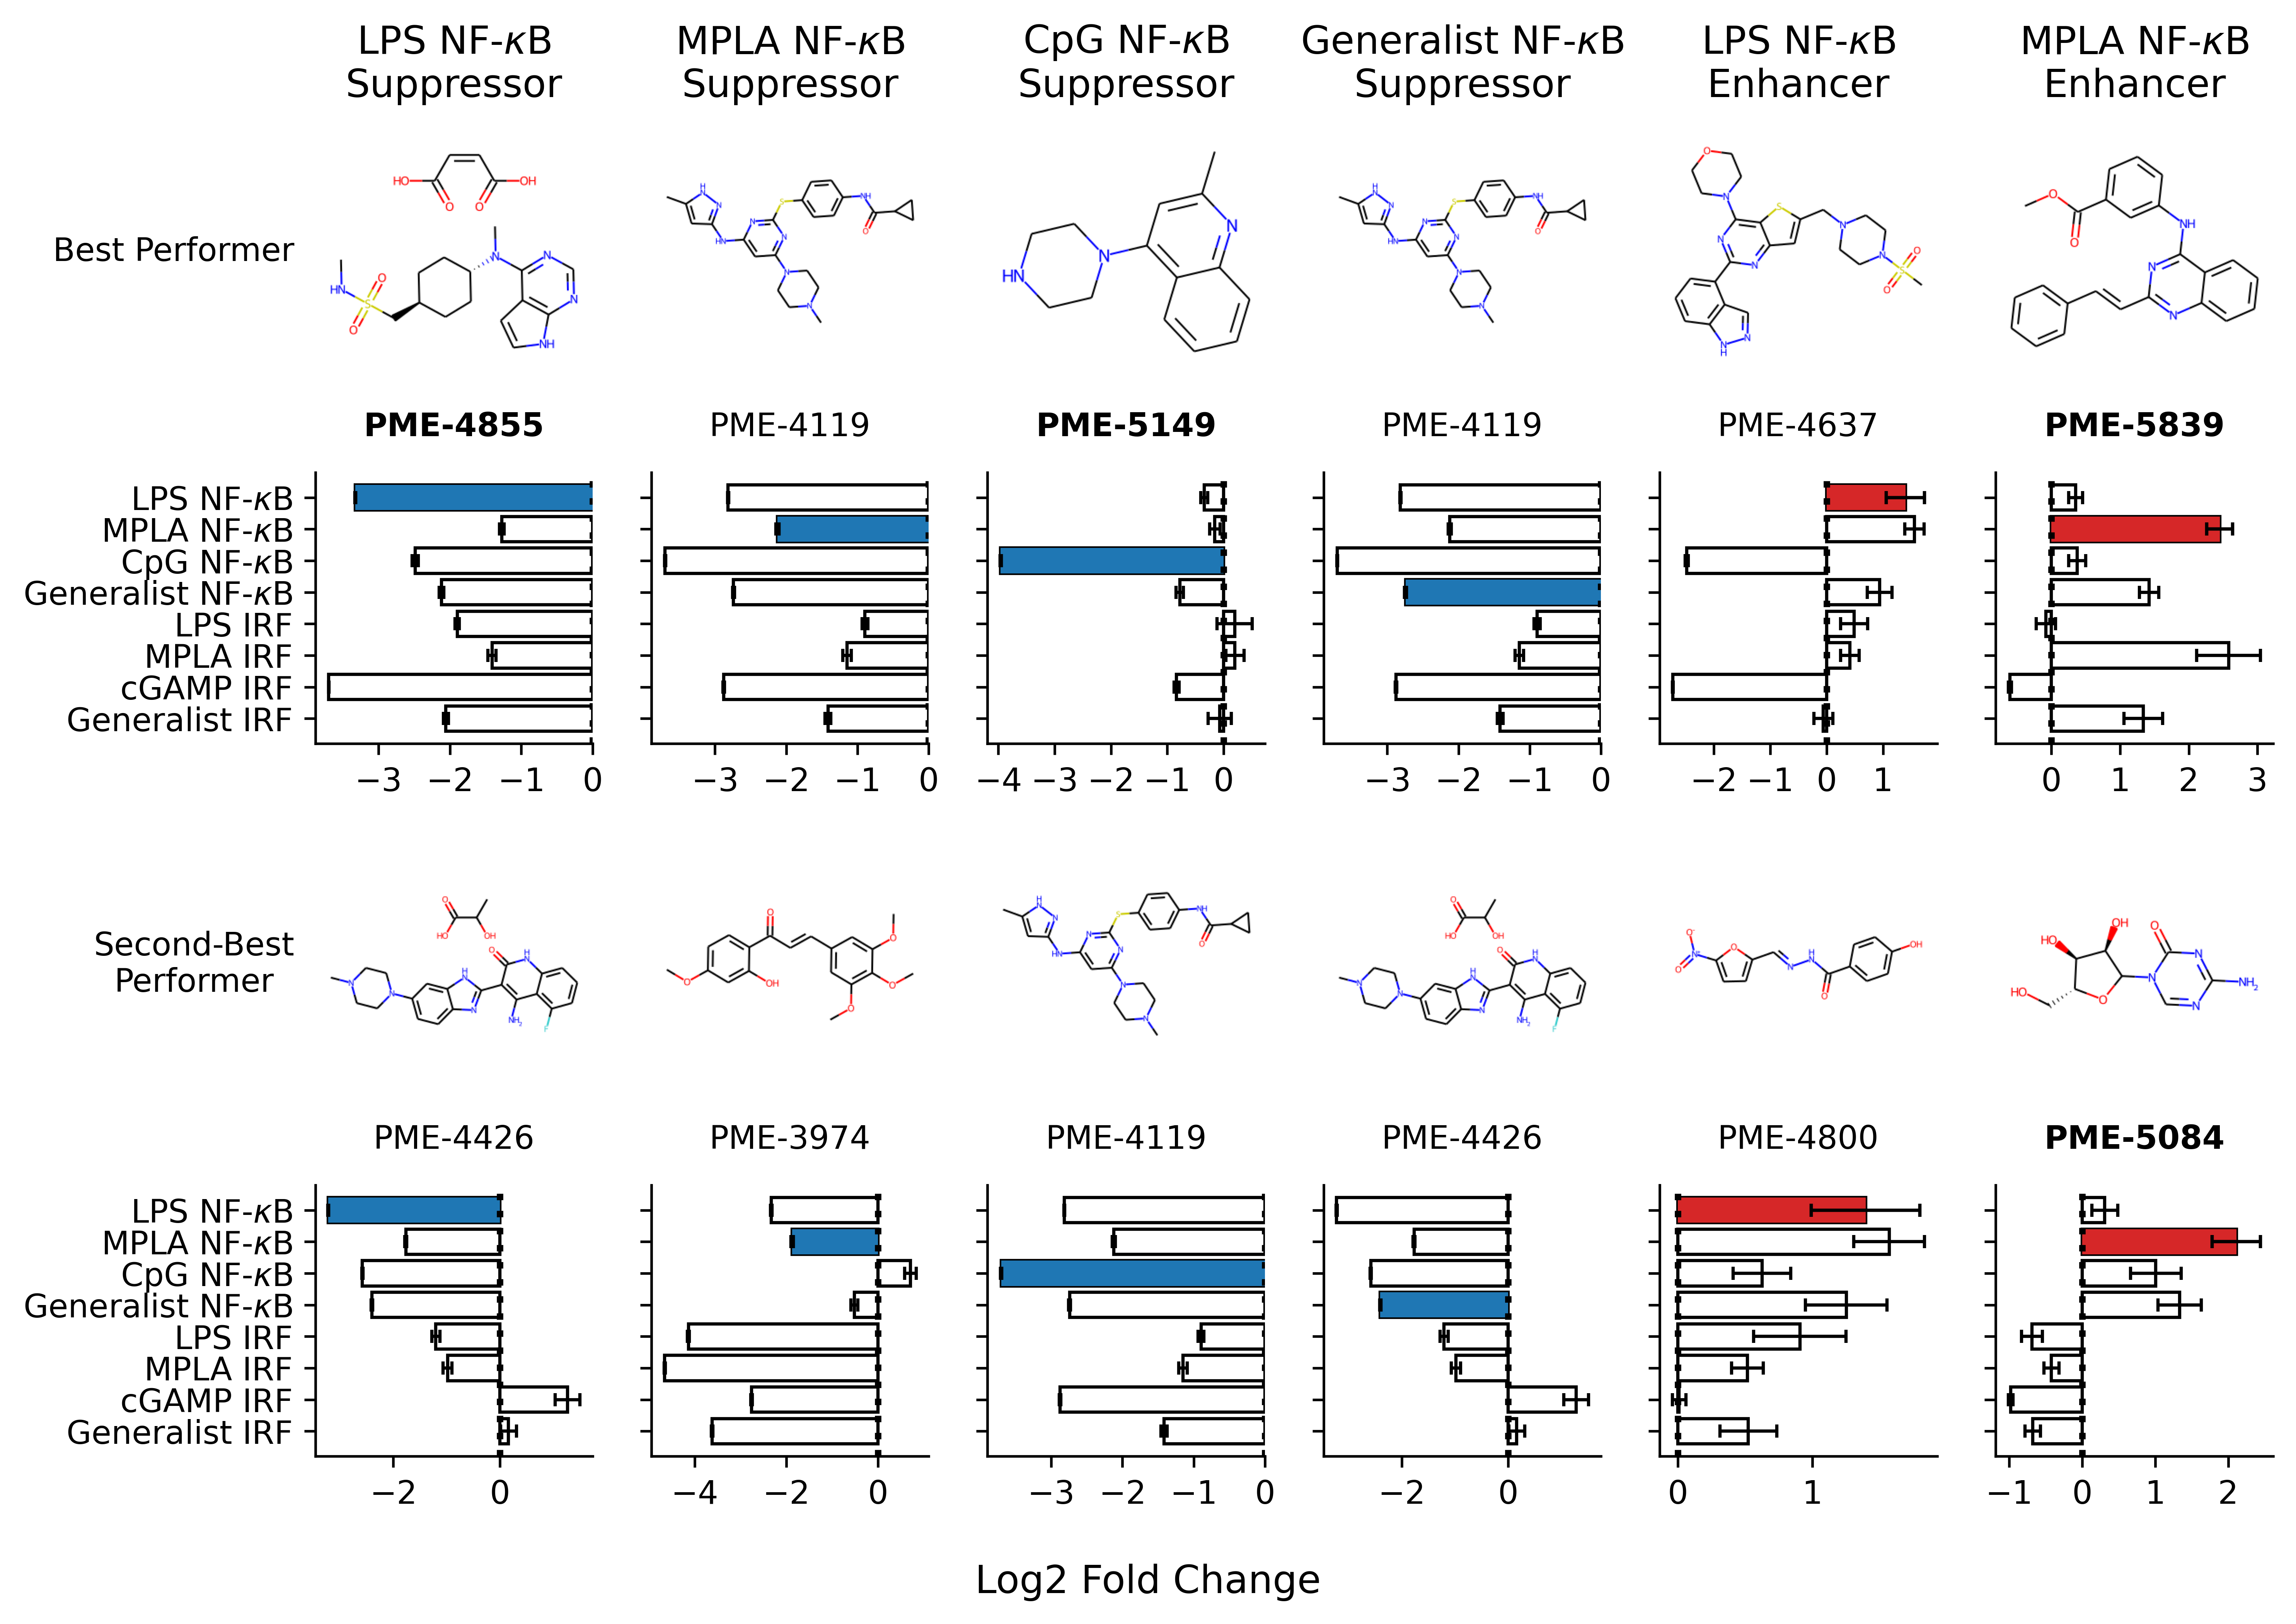

In [7]:
plt.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(nrows=4, ncols=6, dpi=600, figsize=(10,7))

for i in range(4):
    for j in range(6):
        k = i // 2 + j * 2 # index of row in df
        ax = axs[i,j]
        if i % 2 == 0:
            mol_image = np.asarray(Image.open(f'mols/{df.loc[k, "PME Code"]}.png'))
            ax.imshow(mol_image)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.set_xticks([])
            ax.set_yticks([])
            mol = df.loc[k, "PME Code"]
            if mol in bmdc['PME Code'].values:
                ax.set_xlabel(mol, weight='bold')
            else:
                ax.set_xlabel(mol)
            if i == 0:
                objective = df['selection objective'][k].replace('k', '$\\kappa$')
                if 'LM' in objective:
                    objective = objective.replace('LMCpG', 'Generalist').replace('LMcGAMP', 'Generalist')
                # ax.set_ylabel(objective, rotation='horizontal', ha='right')
                ax.set_title(objective.replace(' Suppressor', '\nSuppressor').replace(' Enhancer', '\nEnhancer'))
            if i == 0 and j == 0:
                ax.set_ylabel('Best Performer', rotation='horizontal', horizontalalignment='right', verticalalignment='center', multialignment='center')
            if i == 2 and j == 0:
                ax.set_ylabel('Second-Best\nPerformer', rotation='horizontal', horizontalalignment='right', verticalalignment='center', multialignment='center')
        if i % 2 == 1:
            if j in range(4):
                plot_mod(ax, k, j)
            else:
                plot_mod(ax, k, j-4)
            if j != 0:
                ax.set_yticklabels([])
fig.supxlabel('Log2 Fold Change')
plt.tight_layout()
plt.savefig('top-performer-structure-1.png')
plt.savefig('top-performer-structure-1.svg')
plt.savefig('top-performer-structure-1.pdf')
plt.show()

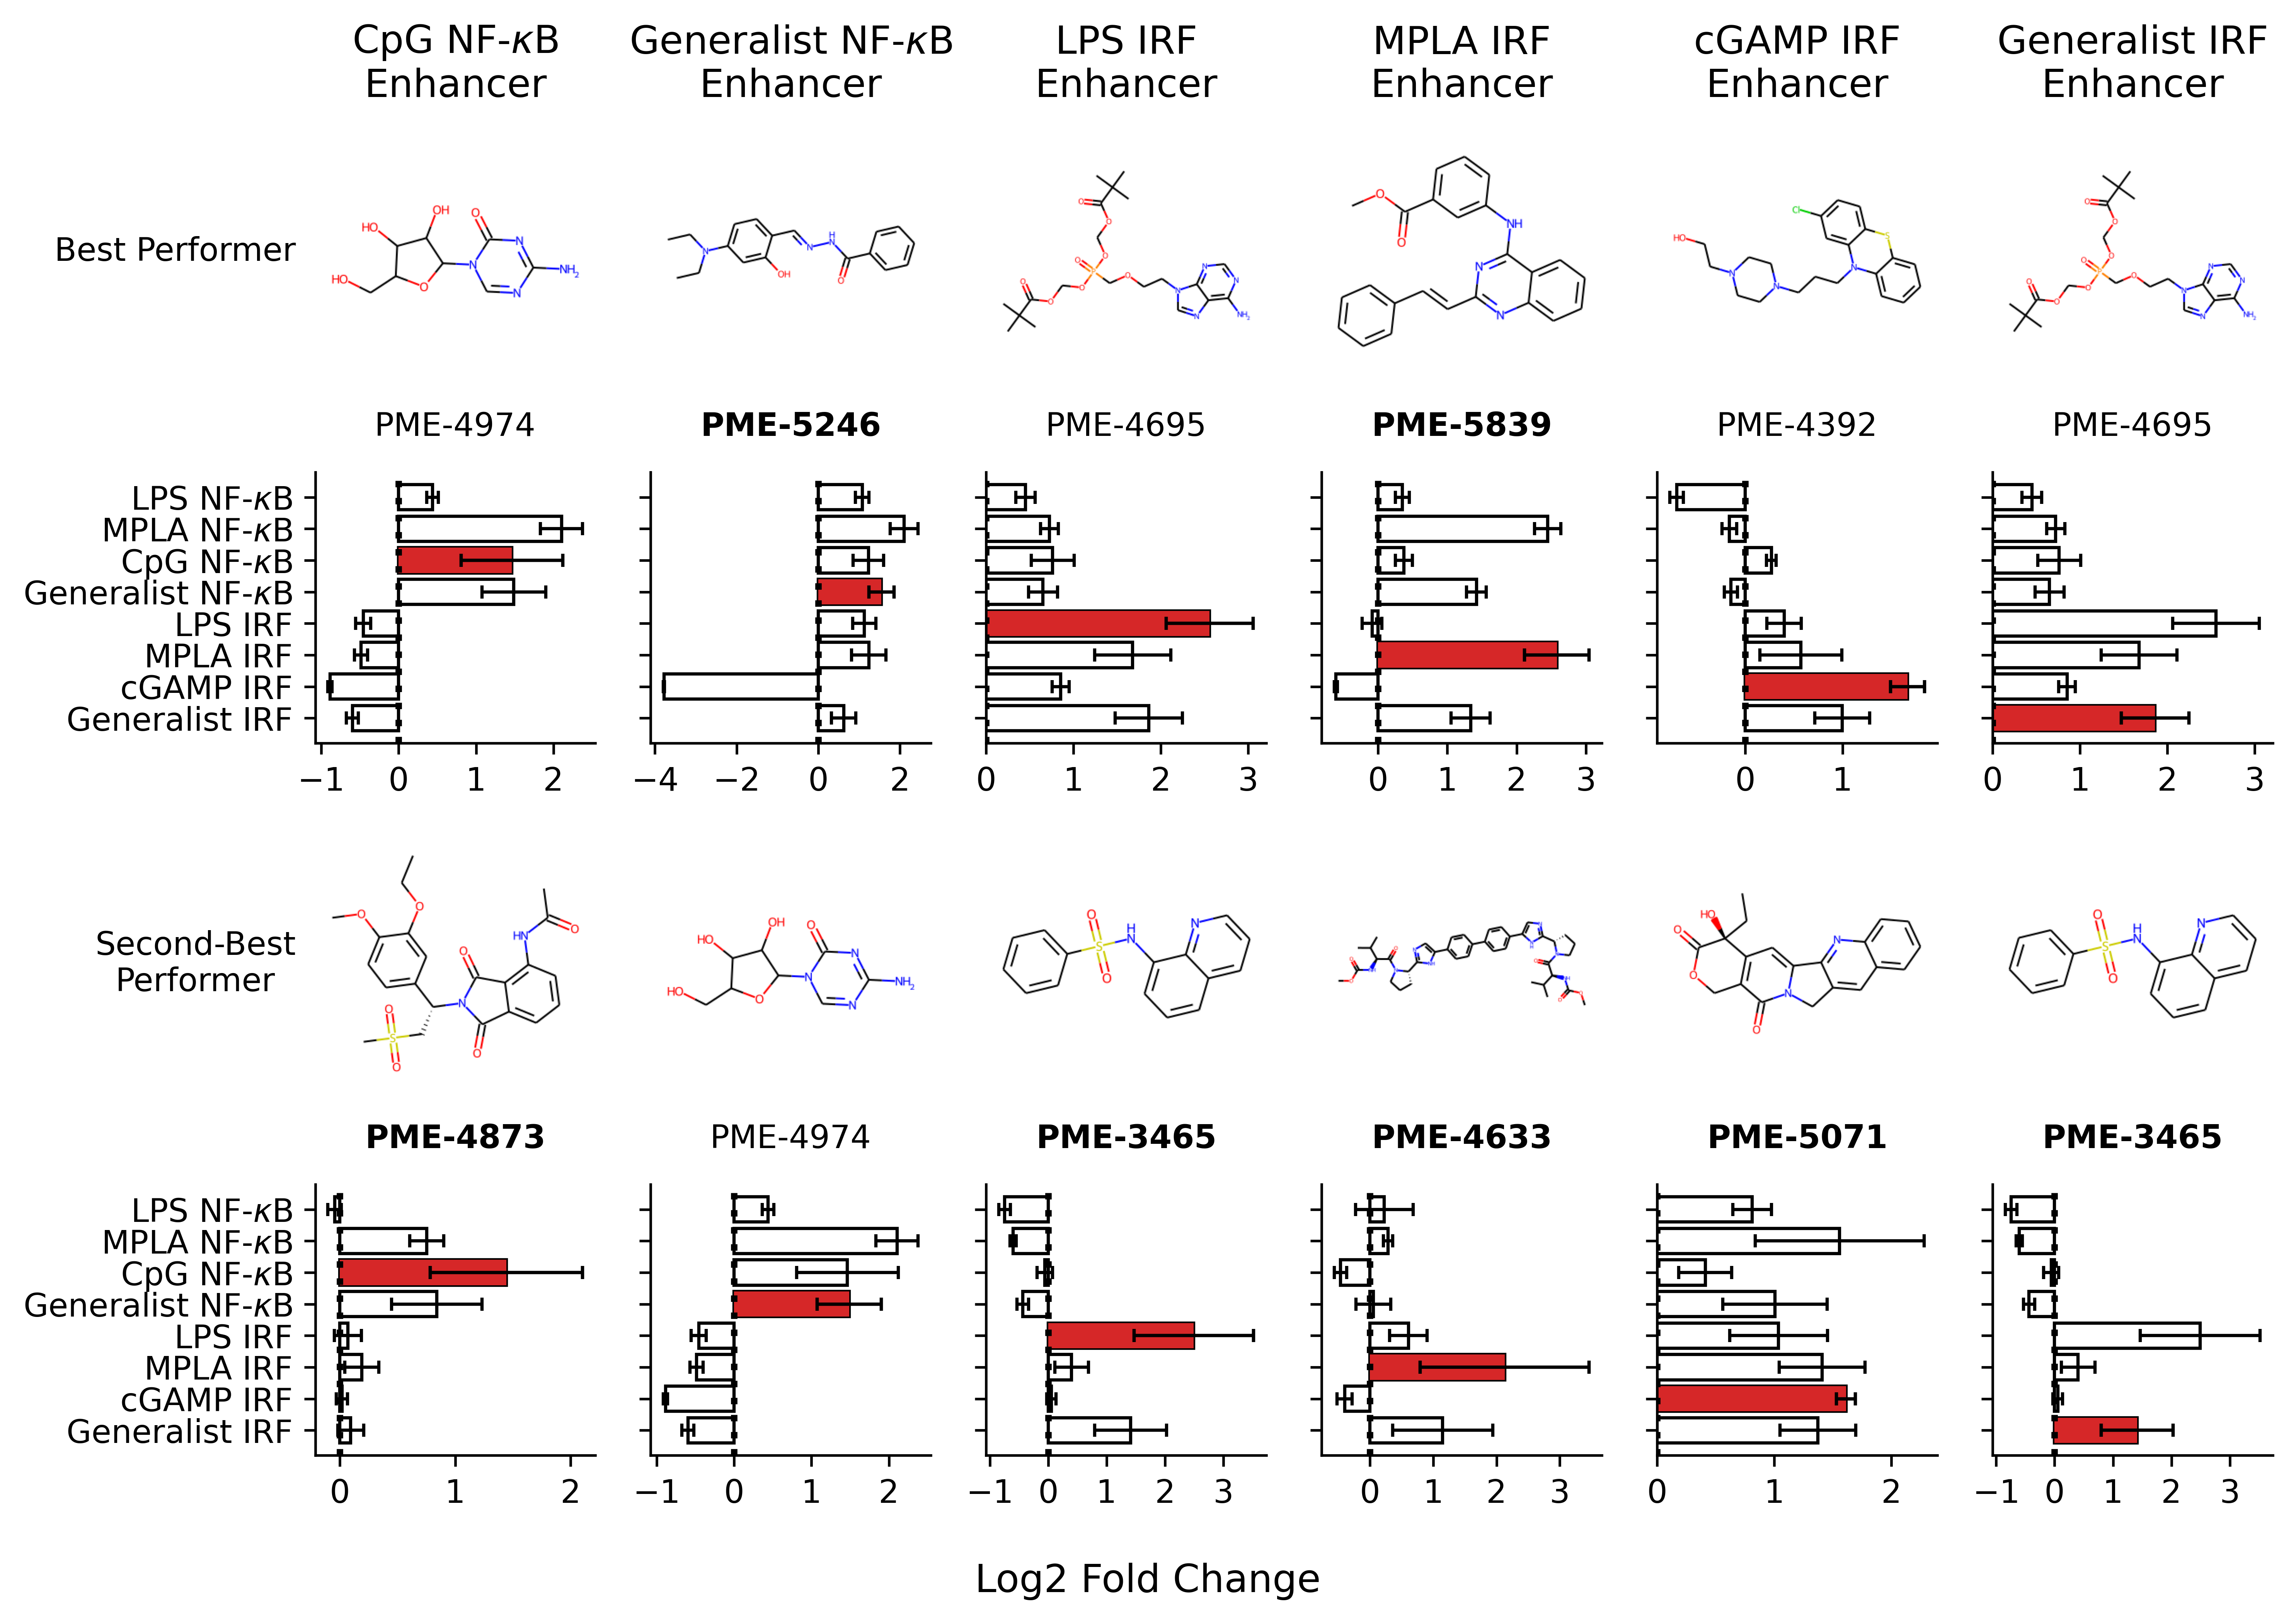

In [8]:
plt.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(nrows=4, ncols=6, dpi=600, figsize=(10,7))

for i in range(4):
    for j in range(6):
        k = i // 2 + j * 2 + 12 # index of row in df
        ax = axs[i,j]
        if i % 2 == 0:
            mol_image = np.asarray(Image.open(f'mols/{df.loc[k, "PME Code"]}.png'))
            ax.imshow(mol_image)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.set_xticks([])
            ax.set_yticks([])
            mol = df.loc[k, "PME Code"]
            if mol in bmdc['PME Code'].values:
                ax.set_xlabel(mol, weight='bold')
            else:
                ax.set_xlabel(mol)
            if i == 0:
                objective = df['selection objective'][k].replace('k', '$\\kappa$')
                if 'LM' in objective:
                    objective = objective.replace('LMCpG', 'Generalist').replace('LMcGAMP', 'Generalist')
                # ax.set_ylabel(objective, rotation='horizontal', ha='right')
                ax.set_title(objective.replace(' Suppressor', '\nSuppressor').replace(' Enhancer', '\nEnhancer'))
            if i == 0 and j == 0:
                ax.set_ylabel('Best Performer', rotation='horizontal', horizontalalignment='right', verticalalignment='center', multialignment='center')
            if i == 2 and j == 0:
                ax.set_ylabel('Second-Best\nPerformer', rotation='horizontal', horizontalalignment='right', verticalalignment='center', multialignment='center')
        if i % 2 == 1:
            plot_mod(ax, k, j+2)
            if j != 0:
                ax.set_yticklabels([])
fig.supxlabel('Log2 Fold Change')
plt.tight_layout()
plt.savefig('top-performer-structure-2.png')
plt.savefig('top-performer-structure-2.svg')
plt.savefig('top-performer-structure-2.pdf')
plt.show()

In [9]:
bmdc_ex = [pmecode for pmecode in bmdc['PME Code'] if pmecode not in df['PME Code'].values]
bmdc_ex

['PME-3878',
 'PME-3386',
 'PME-4671',
 'PME-3873',
 'PME-4425',
 'PME-5920',
 'PME-4007',
 'PME-3808']

In [10]:
bmdc

Experiment #  Catalog             library  PME Code  \
0              1   138180           Prestwick  PME-5071   
1              2   138540           Prestwick  PME-3878   
2              3   139428     Selleckchem FDA  PME-3386   
3              4   139796     Selleckchem FDA  PME-4855   
4              5   139336     Selleckchem FDA  PME-4671   
5              6   139204     Selleckchem FDA  PME-4633   
6              7   139784     Selleckchem FDA  PME-4873   
7              8   138465           Prestwick  PME-3873   
8              9    55572  ChemBridge ES550-2  PME-5149   
9             10   139753     Selleckchem FDA  PME-4425   
10            11     9929  ChemBridge DS550-3  PME-3465   
11            12     6017  ChemBridge DS550-3  PME-5246   
12            13     8269  ChemBridge DS550-3  PME-5920   
13            14     4828  ChemBridge DS550-3  PME-4007   
14            15    70420  ChemBridge ES550-2  PME-5839   
15            16    64437  ChemBridge ES550-2  PME-3808   
16            17   138632           Prestwick  PME-5084   

                                               SMILES  Viability Mask 1  \
0   CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3ccccc3nc2-1         70.026687   
1   COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...         23.557758   
2   CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCC[C@H]3C...          2.161290   
3   CNS(=O)(=O)C[C@H]1CC[C@H](N(C)c2ncnc3[nH]ccc23...         99.823172   
4                 COc1ccc([C@H]2CNC(=O)C2)cc1OC1CCCC1         98.129749   
5   COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2ccc(-c3...         98.777089   
6   CCOc1cc([C@@H](CS(C)(=O)=O)N2C(=O)c3cccc(NC(C)...         98.244803   
7         CCN(CC)CCCC(C)Nc1c2ccc(Cl)cc2nc2ccc(OC)cc12         75.614692   
8                           Cc1cc(N2CCNCC2)c2ccccc2n1         99.242933   
9   Cc1ccc(S(=O)(=O)O)cc1.NC(=O)c1cccc2cn(-c3ccc([...         84.988039   
10                   O=S(=O)(Nc1cccc2cccnc12)c1ccccc1         72.018879   
11              CCN(CC)c1ccc(C=NNC(=O)c2ccccc2)c(O)c1         75.116810   
12           CCN(CC)c1ccc(C=NNC(=O)c2ccc(O)cc2)c(O)c1         43.437277   
13                O=S1(=O)Nc2c(ccc3cccnc23)-c2ccccc21         51.819833   
14      COC(=O)c1cccc(Nc2nc(C=Cc3ccccc3)nc3ccccc23)c1         82.762709   
15      Fc1ccc(Oc2nc(Nc3cccc(Cl)c3)nc(N3CCOCC3)n2)cc1         77.915627   
16        Nc1ncn(C2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1         73.896501   

    Viability Mask 2   LPS Abs  MPLA Abs   CpG Abs  ...  cGAMP Lum  \
0          83.564790  1.754225  2.946302  1.329549  ...   3.059090   
1          41.390892  0.066742  0.094987  0.070473  ...   0.021358   
2           6.184407  0.050467  0.113745  0.337605  ...   0.024393   
3          99.616351  0.099942  0.413859  0.178629  ...   0.077135   
4          98.222943  2.205368  1.900036  2.608719  ...   0.902336   
5          98.666191  1.169132  1.216268  0.724044  ...   0.756542   
6          97.236498  0.969356  1.686283  2.719268  ...   1.012846   
7          89.459867  0.167110  0.447121  0.078474  ...   0.034570   
8          99.517473  0.788874  0.898852  0.064291  ...   0.560578   
9          91.249750  0.142405  0.371568  0.079770  ...   0.040980   
10         77.043247  0.596631  0.658653  0.961002  ...   1.038111   
11         87.695972  2.107345  4.298026  2.338789  ...   0.072897   
12         71.981299  1.309993  5.860873  2.518654  ...   0.199944   
13         82.368903  1.375078  2.342243  0.603077  ...  15.028693   
14         87.437767  1.276337  5.464253  1.298556  ...   0.658305   
15         90.144082  1.329594  2.574411  0.331237  ...   0.756549   
16         87.308144  1.238237  4.315449  2.010284  ...   0.507841   

    LMcGAMP Lum  LPS Abs Std  MPLA Abs Std  CpG Abs Std  LMCpG Abs Std  \
0      2.588904     0.164820      0.720446     0.227009       0.446371   
1      0.023283     0.019345      0.009158     0.005413       0.012746   
2      0.032364     0.004458      0.004921     0.017558       0.010838   
3      0.240635     0.005009     

In [11]:
bmdc.iloc[0, -8:][::-1]

LMcGAMP Lum Std    0.323538
cGAMP Lum Std       0.08085
MPLA Lum Std        0.36598
LPS Lum Std        0.416595
LMCpG Abs Std      0.446371
CpG Abs Std        0.227009
MPLA Abs Std       0.720446
LPS Abs Std         0.16482
Name: 0, dtype: object

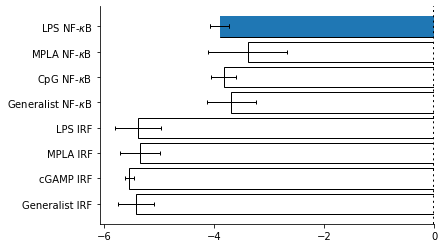

In [12]:
def plot_bmdc_mod(ax, i, col_hightlight=None):
    ax.barh(np.arange(8), np.log2(bmdc[bmdc['PME Code'] == bmdc_ex[i]].iloc[:, -16:-8].astype(float)).values.squeeze()[::-1], xerr=bmdc.iloc[i, -8:][::-1], error_kw=dict(lw=1, capsize=2, capthick=1), fill=False)
    if col_hightlight is not None:
        if type(col_hightlight) != list:
            foldchange = np.log2(bmdc[bmdc['PME Code'] == bmdc_ex[i]].iloc[:, -16+col_hightlight].astype(float)).values[0]
            ax.barh(7-col_hightlight, foldchange, xerr=bmdc.iloc[i, -8+col_hightlight], error_kw=dict(lw=1, capsize=2, capthick=1), color='tab:blue' if foldchange < 0 else 'tab:red')
        else:
            for col in col_hightlight:
                foldchange = np.log2(bmdc[bmdc['PME Code'] == bmdc_ex[i]].iloc[:, -16+col].astype(float)).values[0]
                ax.barh(7-col, foldchange, xerr=bmdc.iloc[i, -8+col], error_kw=dict(lw=1, capsize=2, capthick=1), color='tab:blue' if foldchange < 0 else 'tab:red')
    ax.set_yticks(np.arange(8))
    ax.set_yticklabels(xticklabels[::-1])
    # ax.set_xlabel('Log2 Fold Change')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(5, integer=True))
    # ax.set_xscale('log', base=2)
    # ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    # ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{round(np.log2(float(y))):d}'))
    # ax.set_xticks(ax.get_xticks()[1:-1])
    ax.axvline(0, color='k', linewidth=2, linestyle=':')

fig, ax = plt.subplots(1,1)
plot_bmdc_mod(ax, 0, 0)

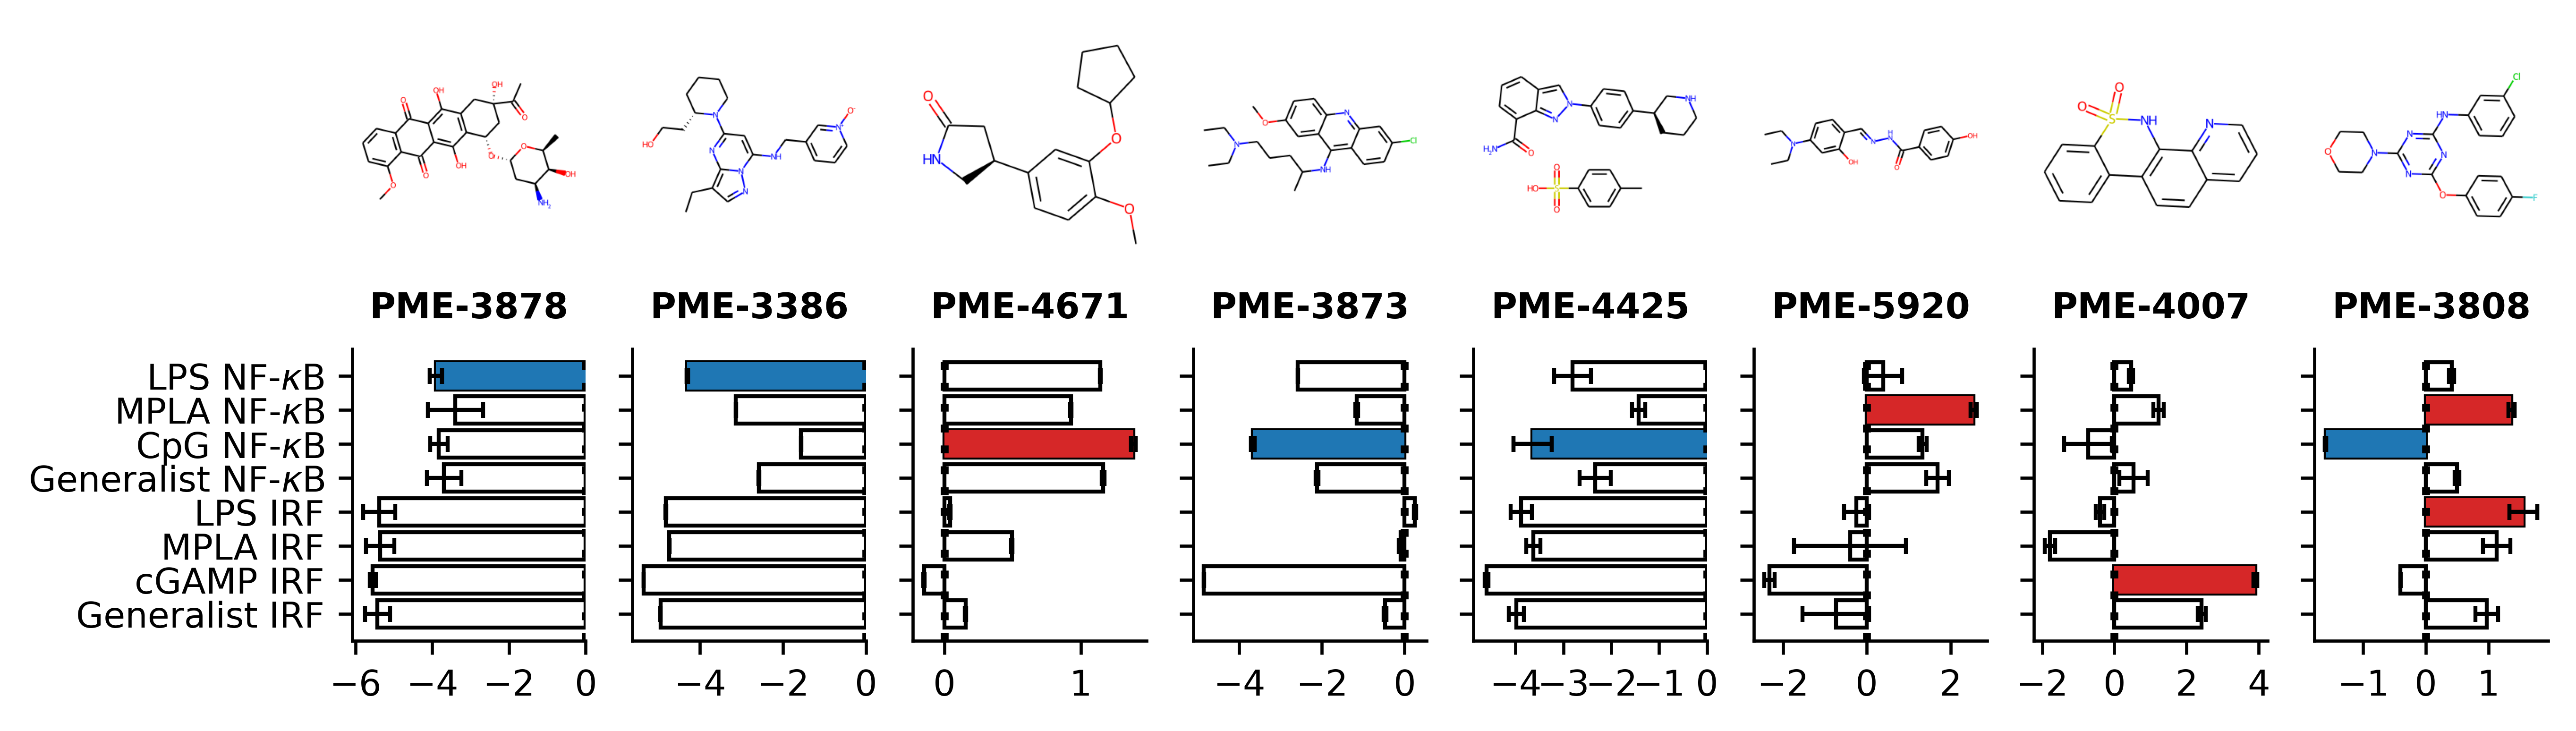

In [13]:
plt.rcParams.update({'font.size': 9})
fig, axs = plt.subplots(nrows=2, ncols=8, dpi=600, figsize=(10,3))

plot_bmdc_mod(axs[1,0], 0, 0)
plot_bmdc_mod(axs[1,1], 1, 0)
plot_bmdc_mod(axs[1,2], 2, 2)
plot_bmdc_mod(axs[1,3], 3, 2)
plot_bmdc_mod(axs[1,4], 4, 2)
plot_bmdc_mod(axs[1,5], 5, 1)
plot_bmdc_mod(axs[1,6], 6, 6)
plot_bmdc_mod(axs[1,7], 7, [1,2,4])

for i in range(2):
    for j in range(8):
        ax = axs[i,j]
        if i == 0:
            mol = bmdc_ex[j]
            mol_image = np.asarray(Image.open(f'bmdc_mols/{mol}.png'))
            ax.imshow(mol_image)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel(mol, weight='bold')
        if i == 1 and j != 0:
            ax.set_yticklabels([])
# fig.supxlabel('Log2 Fold Change')
# plt.tight_layout()
plt.savefig('top-performer-structure-3.png')
plt.savefig('top-performer-structure-3.svg')
plt.savefig('top-performer-structure-3.pdf')
plt.show()